### Business Problem

### Research Question

### Important Libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

#### Load the datasets

In [71]:
df = pd.read_csv('Fb_Ig_Ad_Data.csv')

In [72]:
df.head()

,Date,Month,Day,FB_campaign,FB_Ad_Impressions,FB_Ad_Clicks,Fb_Ad_CTR,FB_Ad_Conversions,FB_Ad_CPA,FB_Ad_CVR,FB_Ad_CPC,IG_Ad_campaign_Name,IG_Ad_Impressions,IG_Ad_Clicks,IG_Ad_CTR,IG_Ad_Conversions,IG_Ad_CVR,IG_Ad_CPA,IG_Ad_CPC
0,2/6/2025,Feb,Thu,FB_FEB,4174,309,0.07,62,82.1,0.10,33,IG_FEB,4582,63,0.01,0,0.00,161.31,136
1,2/6/2025,Feb,Thu,FB_FEB,4507,348,0.08,73,101.6,0.11,50,IG_FEB,4437,552,0.12,3,0.01,141.26,90
2,2/6/2025,Feb,Thu,FB_FEB,1860,84,0.05,1,92.1,0.01,51,IG_FEB,4454,195,0.04,5,0.03,52.89,44
3,2/4/2025,Feb,Tue,FB_FEB,2294,182,0.08,7,79.9,0.04,62,IG_FEB,2346,41,0.02,2,0.05,103.21,91
4,2/6/2025,Feb,Thu,FB_FEB,2130,111,0.05,2,72.1,0.01,36,IG_FEB,2122,41,0.02,0,0.00,177.99,140


# Basic Explorative Analysis

### Count of Rows and Columns of the dataset

In [73]:
df.shape

(273, 19)

### Data types of the columns

In [74]:
df.dtypes

Date                    object
Month                   object
Day                     object
FB_campaign             object
FB_Ad_Impressions        int64
FB_Ad_Clicks             int64
Fb_Ad_CTR              float64
FB_Ad_Conversions        int64
FB_Ad_CPA              float64
FB_Ad_CVR              float64
FB_Ad_CPC                int64
IG_Ad_campaign_Name     object
IG_Ad_Impressions        int64
IG_Ad_Clicks             int64
IG_Ad_CTR              float64
IG_Ad_Conversions        int64
IG_Ad_CVR              float64
IG_Ad_CPA              float64
IG_Ad_CPC                int64
dtype: object

### Converting data to datetime

In [75]:
df['Date'] = pd.to_datetime(df['Date'])

### Descriptive statistics of the dataset

In [76]:
df.describe()

,Date,FB_Ad_Impressions,FB_Ad_Clicks,Fb_Ad_CTR,FB_Ad_Conversions,FB_Ad_CPA,FB_Ad_CVR,FB_Ad_CPC,IG_Ad_Impressions,IG_Ad_Clicks,IG_Ad_CTR,IG_Ad_Conversions,IG_Ad_CVR,IG_Ad_CPA,IG_Ad_CPC
count,273,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,2025-06-14 11:04:36.923076864,3095.666667,245.582418,0.076996,16.172161,127.278755,0.042234,93.919414,2977.073260,227.230769,0.078755,6.245421,0.027033,127.770293,139.065934
min,2025-02-01 00:00:00,1021.000000,17.000000,0.010000,0.000000,50.500000,0.000000,23.000000,1003.000000,17.000000,0.010000,0.000000,0.000000,50.080000,32.000000
25%,2025-04-03 00:00:00,2152.000000,104.000000,0.050000,2.000000,86.900000,0.020000,56.000000,1942.000000,118.000000,0.050000,1.000000,0.010000,92.070000,84.000000
50%,2025-06-18 00:00:00,3062.000000,224.000000,0.080000,9.000000,129.100000,0.040000,79.000000,2991.000000,202.000000,0.080000,5.000000,0.030000,131.660000,122.000000
75%,2025-08-21 00:00:00,4092.000000,346.000000,0.110000,23.000000,165.700000,0.060000,116.000000,4025.000000,311.000000,0.110000,11.000000,0.040000,161.690000,166.000000
max,2025-10-30 00:00:00,4993.000000,717.000000,0.150000,90.000000,198.500000,0.130000,301.000000,4997.000000,674.000000,0.150000,23.000000,0.090000,199.940000,424.000000
std,NaN,1127.172821,165.415368,0.039581,19.365193,44.530974,0.030033,55.108857,1197.810157,139.186957,0.037268,5.439695,0.021531,42.298794,77.522265


### Interpretation 

In [77]:
df.columns

Index(['Date', 'Month', 'Day', 'FB_campaign', 'FB_Ad_Impressions',
       'FB_Ad_Clicks', 'Fb_Ad_CTR', 'FB_Ad_Conversions', 'FB_Ad_CPA',
       'FB_Ad_CVR', 'FB_Ad_CPC', 'IG_Ad_campaign_Name', 'IG_Ad_Impressions',
       'IG_Ad_Clicks', 'IG_Ad_CTR', 'IG_Ad_Conversions', 'IG_Ad_CVR',
       'IG_Ad_CPA', 'IG_Ad_CPC'],
      dtype='object')

### Using Histogram to compare campaign performances

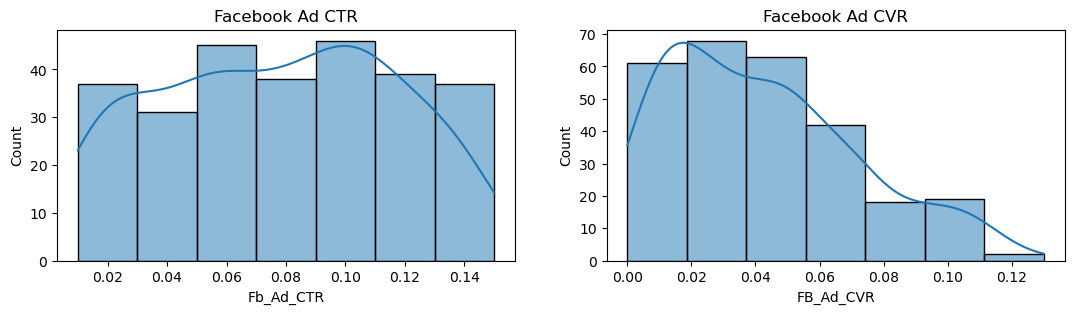

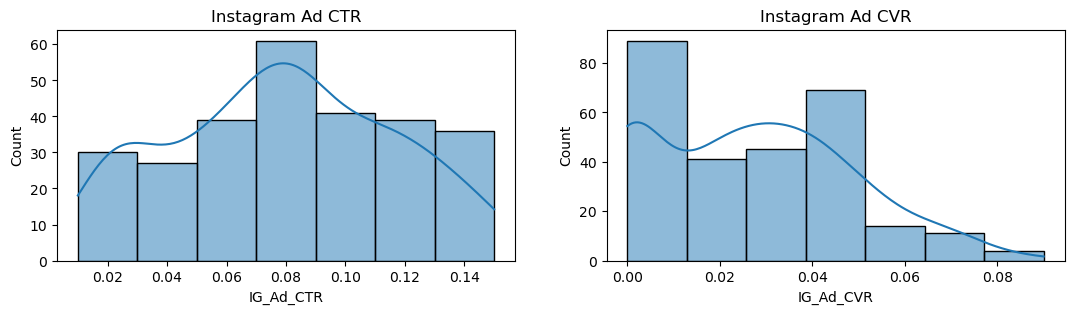

In [78]:
# distribution of clicks and conversions

plt.figure(figsize=(13,3))
plt.subplot(1,2,1)
plt.title('Facebook Ad CTR')
sns.histplot(df['Fb_Ad_CTR'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad CVR')
sns.histplot(df['FB_Ad_CVR'], bins = 7, edgecolor = 'k', kde = True)
plt.show()



plt.figure(figsize=(13,3))
plt.subplot(1,2,1)
plt.title('Instagram Ad CTR')
sns.histplot(df['IG_Ad_CTR'], bins = 7, edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title('Instagram Ad CVR')
sns.histplot(df['IG_Ad_CVR'], bins = 7, edgecolor = 'k', kde = True)
plt.show()



### RESULT

#### Univariate Analysis

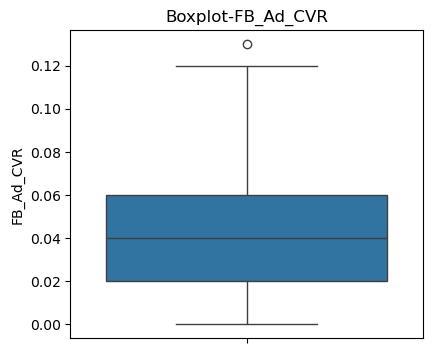

In [79]:
variable = 'FB_Ad_CVR'

plt.figure(figsize=(10,4))


# Box plot
plt.subplot(1,2,1)
sns.boxplot(y= variable, data=df)
plt.title(f'Boxplot-{variable}')

plt.show()




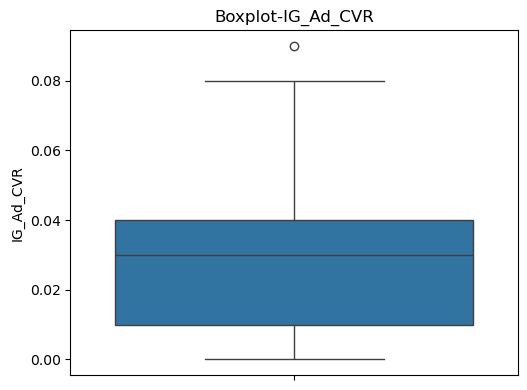

In [80]:
variable1 = 'IG_Ad_CVR'

plt.figure(figsize=(10,4))

# Box plot
plt.subplot(1,2,2)
sns.boxplot(y= variable1, data=df)
plt.title(f'Boxplot-{variable1}')
plt.tight_layout()
plt.show()

### Boxplot Analysis: Comparing Days with High vs Low Conversion Performance

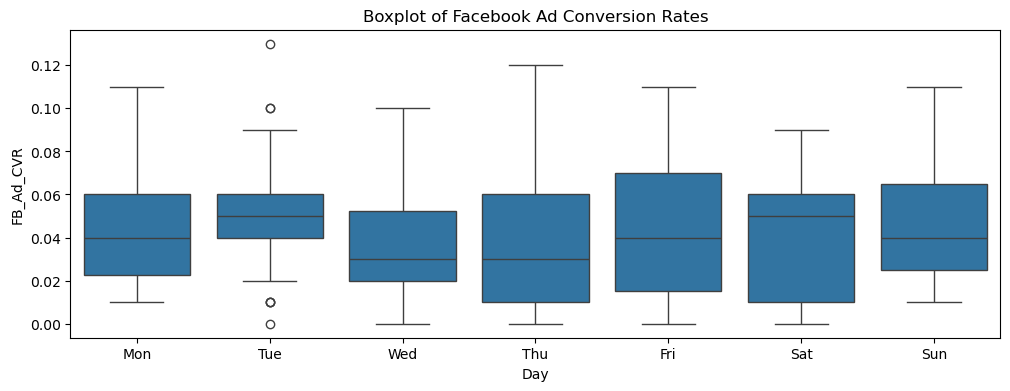

In [81]:
plt.figure(figsize=(12,4))
plt.title('Boxplot of Facebook Ad Conversion Rates')
sns.boxplot(x='Day', y='FB_Ad_CVR', data=df, order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### Boxplot Analysis: Instagram Ad Conversion Rates (Day-by-Day Performance)

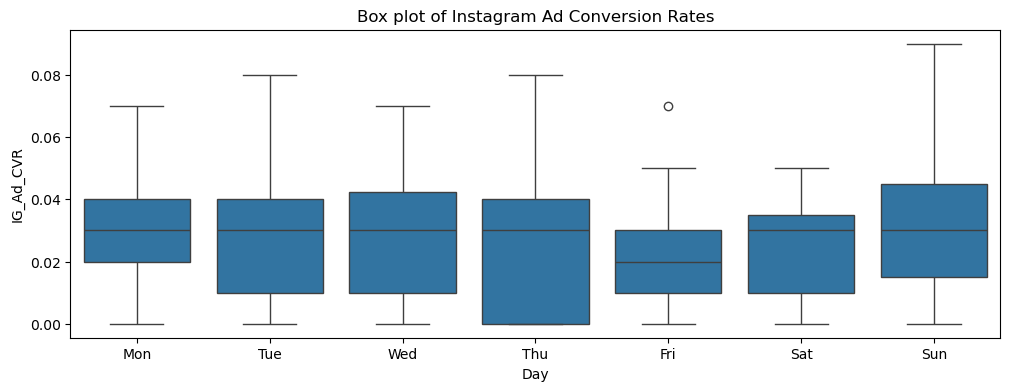

In [82]:
plt.figure(figsize=(12,4))
plt.title('Box plot of Instagram Ad Conversion Rates')
sns.boxplot(x='Day', y='IG_Ad_CVR', data=df, order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

## Comparing how often we observed days with high conversions versus days with low conversions

### Create the new category column using np.where

In [83]:
# Facebook Ads
# Create percentile cutoffs 
low_cut = df['FB_Ad_CVR'].quantile(0.33)
high_cut = df['FB_Ad_CVR'].quantile(0.66)

# Categorize
def categorize(x):
    if x <= low_cut:
        return 'Low'
    elif x <= high_cut:
        return 'Medium'
    else: 
        return 'High'
df['FB_Conversion_Rate_Category'] = df['FB_Ad_CVR'].apply(categorize)

In [84]:
df['FB_Conversion_Rate_Category'].value_counts()

FB_Conversion_Rate_Category
Low       98
Medium    94
High      81
Name: count, dtype: int64

In [85]:
# Instagram Ads
# Create percentile cutoffs 
low_cut = df['IG_Ad_CVR'].quantile(0.33)
high_cut = df['IG_Ad_CVR'].quantile(0.66)

# Categorize
def categorize(x):
    if x <= low_cut:
        return 'Low'
    elif x <= high_cut:
        return 'Medium'
    else: 
        return 'High'
df['IG_Conversion_Rate_Category'] = df['IG_Ad_CVR'].apply(categorize)

In [86]:
df['IG_Conversion_Rate_Category'].value_counts()

IG_Conversion_Rate_Category
Low       130
Medium     87
High       56
Name: count, dtype: int64

In [87]:
Facebook = pd.DataFrame(df['FB_Conversion_Rate_Category'].value_counts()).reset_index().rename(columns = {'FB_Conversion_Rate_Category' : 'Category'})
Facebook                                                                                         

,Category,count
0,Low,98
1,Medium,94
2,High,81


In [88]:
Facebook = Facebook.iloc[[1,0,2]]
Facebook

,Category,count
1,Medium,94
0,Low,98
2,High,81


In [89]:
Instagram = pd.DataFrame(df['IG_Conversion_Rate_Category'].value_counts()).reset_index().rename(columns = {'IG_Conversion_Rate_Category' : 'Category'})
Instagram 

,Category,count
0,Low,130
1,Medium,87
2,High,56


In [90]:
Instagram = Instagram .iloc[[0,2,1]]
Instagram 

,Category,count
0,Low,130
2,High,56
1,Medium,87


In [91]:
combine_df = pd.merge(Facebook, Instagram, on ='Category', how = 'outer').fillna(0)
combine_df

,Category,count_x,count_y
0,High,81,56
1,Low,98,130
2,Medium,94,87


In [92]:
combine_df = combine_df.iloc[[1,2,0]]
combine_df

,Category,count_x,count_y
1,Low,98,130
2,Medium,94,87
0,High,81,56


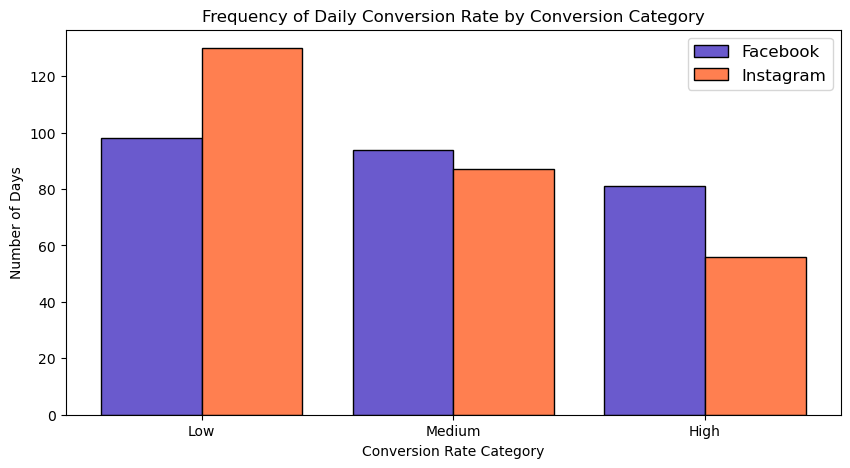

In [93]:
X_axis = np.arange(len(combine_df))
plt.figure(figsize=(10,5))
plt.bar(X_axis - 0.2, combine_df['count_x'], 0.4, label = 'Facebook', color = 'slateblue', linewidth= 1, edgecolor = 'k')
plt.bar(X_axis + 0.2, combine_df['count_y'], 0.4, label = 'Instagram', color = 'coral', linewidth= 1, edgecolor = 'k')



plt.xticks(X_axis,combine_df['Category'])
plt.xlabel('Conversion Rate Category')
plt.ylabel('Number of Days')
plt.title('Frequency of Daily Conversion Rate by Conversion Category', fontsize = 12)
plt.legend (fontsize =12)
plt.show()


### Scatterplots Comparing CTR vs CVR

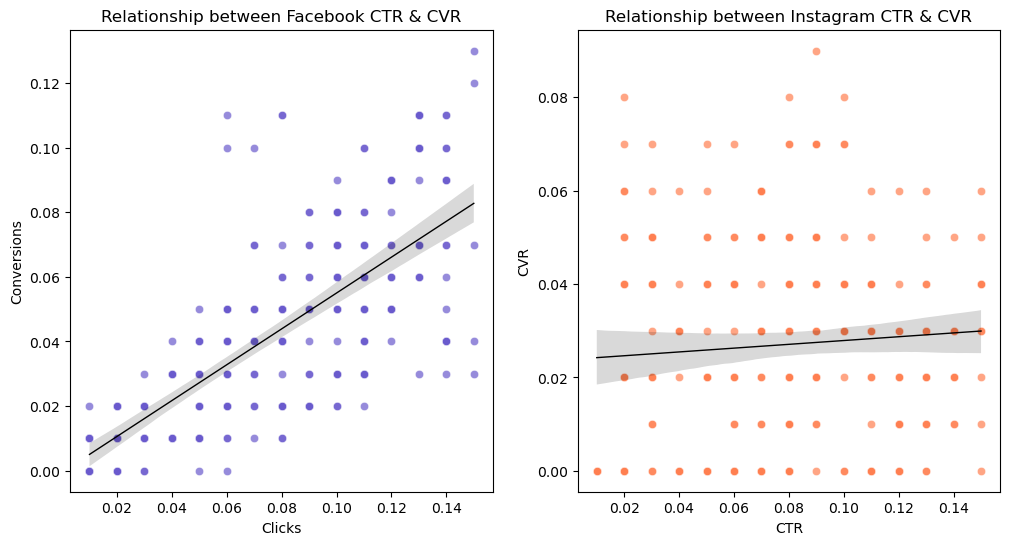

In [94]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Fb_Ad_CTR',y='FB_Ad_CVR', color = 'slateblue', alpha=0.7)
sns.regplot(data=df, x='Fb_Ad_CTR',y='FB_Ad_CVR', scatter= False, color='black', 
            line_kws={'linewidth':1})
plt.title('Relationship between Facebook CTR & CVR')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='IG_Ad_CTR',y='IG_Ad_CVR', color = 'coral', alpha=0.7)
sns.regplot(data=df, x='IG_Ad_CTR',y='IG_Ad_CVR', scatter= False, color='black', 
            line_kws={'linewidth':1})
plt.title('Relationship between Instagram CTR & CVR')
plt.xlabel('CTR')
plt.ylabel('CVR')
plt.show()

### Correlation Analysis : Facebook vs Instagram CTR & CVR

**Objective:** 
* To assess the relationship between CTR and CVR for Facebook and Instagram campaigns

In [95]:
Facebook_corr = df[['FB_Ad_CVR', 'Fb_Ad_CTR']].corr()
Facebook_corr

,FB_Ad_CVR,Fb_Ad_CTR
FB_Ad_CVR,1.000000,0.731533
Fb_Ad_CTR,0.731533,1.000000


In [96]:
Instagram_corr = df[['IG_Ad_Conversions', 'IG_Ad_Clicks']].corr()
Instagram_corr

,IG_Ad_Conversions,IG_Ad_Clicks
IG_Ad_Conversions,1.000000,0.615267
IG_Ad_Clicks,0.615267,1.000000


### Hypothesis Testing

**Hypothesis** : Facebook ads will yield more number of conversions than Instagram ads.

**Null Hypothesis(H0)**: There is no significant difference in conversions between Facebook ads and Instagram ads. 
**FACEBOOK = INSTAGRAM**

**Alternative Hypothesis(H1)**: There is a significant difference in the conversions between Facebook and Instagram ads.
**FACEBOOK > INSTAGRAM**

Since the conversion data is right-skewed and may violate normality assumptions, i will perform a p-value test to determine whether
a t-test or a non-parametric test is appropriate.
--THE LOGIC FOR THE NEXT STEP--

-The Conversion Rates of Facebook Ads and Instagram Ads both show assymetric distribuion
--Decide the next step based on distribution.
* If symmetric and roughly normal, you can likely use a t-test directly. 
* If right- or left-skewed/ not normal, you consider one of these:
* Outlier treatment:remove extreme values (e.g., >75th percentile) or cap them.
* Data transformation: Log, square root, etc., to reduce skeweness.
* Non-parametric test: skip transformations and use Mann-Whitney U test instead of t-test. 

--P-VALUE CHECK BEFORE HYPOTHESIS TESTING--
* The p-value tells you whether you can assume normality:
- p>0.05, data is roughly normal and t test is okay.
- p<= 0.05, data not normal and non-parametric test preferred. 

### Shapiro-Wilk normality test

In [97]:
import scipy.stats as stats
# Separate conversion rates by post type
FB_CVR = df['FB_Ad_CVR'].dropna() 
IG_CVR = df['IG_Ad_CVR'].dropna()

# Shapiro-Wilk normality test for Facebook Ads
stat_FB, p_FB_CVR = stats.shapiro(FB_CVR)
print(f"Facebook CVR: Shapiro-Wilk stat={stat_FB:.3f}, p-value={p_FB_CVR:.3f}")
if p_FB_CVR>0.05:
    print("Facebook conversion rates are approximately normal") 
else: 
    print("Facebook conversion rates are not normal")




# Shapiro-Wilk normality test for Instagram Ads
stat_IG, p_IG_CVR = stats.shapiro(IG_CVR)
print(f"Instagram CVR: Shapiro-Wilk stat={stat_IG:.3f}, p-value={p_IG_CVR:.3f}")
if p_IG_CVR>0.05:
    print("Instagram conversion rates are approximately normal") 
else: 
    print("Instagram conversion rates are not normal")



    

    

Facebook CVR: Shapiro-Wilk stat=0.934, p-value=0.000
Facebook conversion rates are not normal
Instagram CVR: Shapiro-Wilk stat=0.927, p-value=0.000
Instagram conversion rates are not normal


### Shapiro test explanation

### Check Variance Assumptions (Levene's Test)

In [98]:
from scipy.stats import levene
levene_stat, levene_p = levene(df['FB_Ad_CVR'], df['IG_Ad_CVR'])
levene_stat, levene_p

(np.float64(25.750501113260334), np.float64(5.340963281541448e-07))

#### Intepretation of what this means

**Levene p-value<0.05** This tells you variance between Facebook CVR and Instagram CVR are not equal

In [99]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df['FB_Ad_CVR'], df['IG_Ad_CVR'], equal_var= False)
t_stat, p_value
                        

(np.float64(6.7968951920343335), np.float64(3.094984712324814e-11))

### Welch's t-test interpretation (FB vs IG Conversion Rate)

### Business Recommendations Based on A/B Test Results

### Regression Analysis

### Fit the regression

In [100]:
import statsmodels.api as sm 
import pandas as pd

In [101]:
import statsmodels.api as sm 
import numpy as np
# Independent variable

X = df['FB_Ad_Clicks'].values.astype(float) 

# Dependent variable

y = df['FB_Ad_Conversions'].values.astype(float) 

# Add a constant (intercept) to the model 
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     868.5
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           1.68e-86
Time:                        13:37:31   Log-Likelihood:                -999.85
No. Observations:                 273   AIC:                             2004.
Df Residuals:                     271   BIC:                             2011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9277      1.026     -8.699      0.0

### Explanation of the Statistical Modelling

#### Predicting Conversions


In [102]:
# Create a smooth range of clicks

click_range = np.linspace(0, df['FB_Ad_Clicks'].max(), 100)



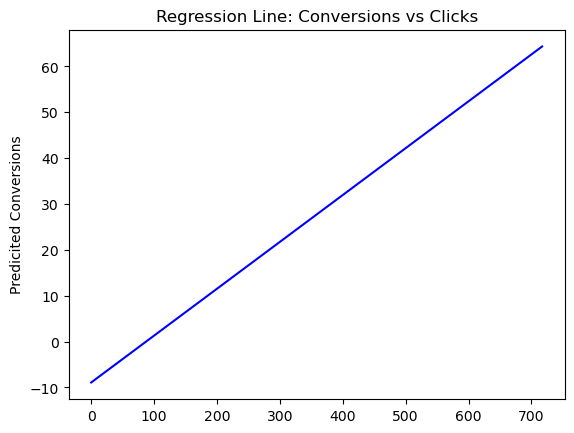

In [103]:
# Prepare the same structure used when training
click_range_with_const = sm.add_constant(click_range)

# Predict conversions for this full range
predicted_conversions = model.predict(click_range_with_const)

# Plot
plt.plot(click_range, predicted_conversions, color = 'blue', label = 'Predicted Conversions')

plt.ylabel("Predicited Conversions")
plt.title("Regression Line: Conversions vs Clicks")
plt.show()

### Interpretation 

### Assumption-Based Facebook ROI Analysis

*Total Facebook ad budget* (assumed): ₦500,000

*Total clicks*: 67,044

*Number of conversions* (Add to Cart): 4,415

*Number of actual sales*: 604

*Revenue per Sale*: ₦5,000

### Calculate Revenue

### Calculate the Profit

### Calculate the ROI

### Calculate the Profit

### Interpretation